<a href="https://colab.research.google.com/github/emisilva12/Coderhouse---Data-Science---Emiliano-Silva/blob/main/Anexo_I_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anexo I - PCA



### Emiliano Silva - Comisión 39985
---

##Carga del dataset y librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Datasets Silva'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Datasets Silva


In [3]:
# Se eliminan las dos últimas columnas como sugiere el propietario de la base de datos
# Se renombra "CLIENTENUM" a "Client_ID" para hacerlo visualmente más amigable
df_creditcard = pd.read_csv('BankChurners.csv')
df_cc = df_creditcard[df_creditcard.columns[0:20]]
df_cc = df_cc.rename(columns={'CLIENTNUM':'Client_ID'})

##Componentes principales

> _Las componentes principales son aquellas "variables" artificiales en donde se encutra la mayor variación marginal del conjunto de datos. Si bien en este notebook no se pueden sacar conclusiones significativas y debería ser omitido, pero a fines de mostrar la herramienta se dejará plasmado el análisis de igual manera._

> _También se aprovecha la ocasión para mostrar como eliminar los outliers, nuevamente aquí no es algo significativo pero es una herramienta importante para tener en cuenta._

Obtendremos las componentes principales a través del PCA y graficaremos las 2 más significativas, además de calcular cuanto explican

In [4]:
# Se crea una copia para no modificar el DF original
df_cc_2 = df_cc.copy()

# Se toman solo las variables que son de tipo numérico y sacamos el Client_ID por no ser una variable de interés
df_cc_2 = df_cc_2.select_dtypes(['int64', 'float64']).drop(columns=['Client_ID'])

# Usamos la función StandarScaler para crear un objeto de estandarización
scaler = StandardScaler()
scaler.fit(df_cc_2.values) # Esto calcula la media y el desvio estandar
df_cc_estandarizado = scaler.transform(df_cc_2.values) # Esto hace la transformación en si

pca = PCA()
pca.fit(df_cc_estandarizado)
df_cc_pca = pca.transform(df_cc_estandarizado)

varianza_explicada = np.round(pca.explained_variance_ratio_*100, 2)
np.cumsum(varianza_explicada)

array([ 17.72,  32.14,  45.54,  56.45,  64.34,  71.99,  79.27,  86.21,
        92.41,  97.02,  98.64, 100.  , 100.  ])

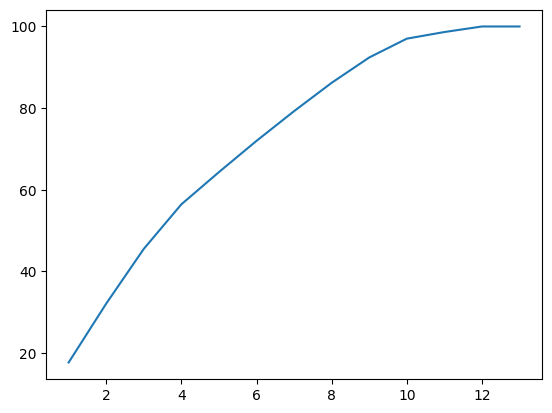

In [5]:
plt.plot(range(1, 14), np.cumsum(varianza_explicada))

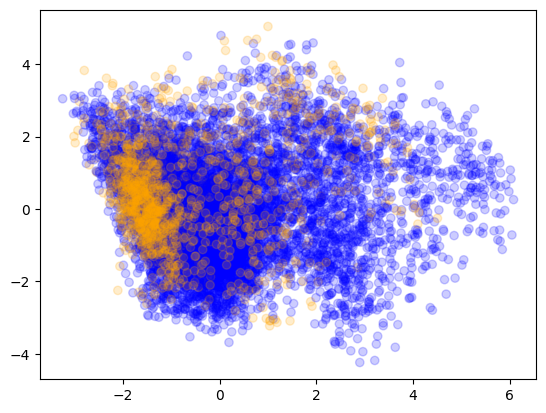

In [6]:
df_cc['Attrition_Flag']

colores = {'Attrited Customer': "orange", 'Existing Customer' : "blue"}
plt.scatter(df_cc_pca[:, 0], df_cc_pca[:, 1], color = [colores[Attrition_Flag] for Attrition_Flag in df_cc.Attrition_Flag], alpha=.2)

Viendo el gráfico de componentes principales, podemos observar que la concentración de abandonos (color naranja) se encuentran más contenida que la de los clientes que aún permanecen (azul).

Pero también es cierto que la expliación de los datos en 2 variables es muy baja (32%) por lo que procederemos a eliminar los outlier para ver como se modifica el procesado de los datos.

In [7]:
# Se crea una copia para no modificar el DF original
Variables = df_cc.copy()

# Se toman solo las variables que son de tipo numérico y sacamos el Client_ID por no ser una variable de interés
Variables = Variables.select_dtypes(['int64', 'float64']).drop(columns=['Client_ID'])

# Estandarizamos y agregamos si es, o no, cliente aún para luego poder realizar el gráfico
z = (Variables[:] - Variables[:].mean())/Variables[:].std()
z['Attrition_Flag'] = df_cc['Attrition_Flag']

# Dejamos todos los valores que presenten un z menor a 3 (eliminamos los outlier)
for i in z:
  if i != 'Attrition_Flag':
    no_outlier = z.drop(z[(abs(z[i]) > 3)].index, inplace=False)

Ya eliminamos los Outlier, por lo que procederemos a analizar el porcentaje de información perdida por el proceso y cuantos datos nos quedan

In [8]:
# Analizamos el porcentaje de perdida de datos por sacar los Outlier
print("Datos perdidos:",(z.shape[0] - no_outlier.shape[0])/ z.shape[0] *100, "%")
print("Cantidad de filas:", no_outlier.shape[0])

Datos perdidos: 1.1158289720549026 %
Cantidad de filas: 10014


Como podemos observar, perdimos muy poca información eliminando los outliers (1.1%) y aún tenemos una gran cantidad de datos (más de 10k)

In [9]:
# Este es otro método para realizar PCA en menos líneas (diferente al explicado en clase)

# Sacamos la variable categórica para realizar el PCA
no_outlier_values = no_outlier.drop(columns=['Attrition_Flag'])

# Entrenamiento modelo PCA con escalado de los datos
no_outlier_pca = make_pipeline(StandardScaler(), PCA())
no_outlier_pca.fit(no_outlier_values)

# Se extrae el modelo entrenado del pipeline
modelo_pca = no_outlier_pca.named_steps['pca']

# Se explica la varianza
varianza_explicada_no_outlier = np.round(modelo_pca.explained_variance_ratio_*100, 2)
np.cumsum(varianza_explicada_no_outlier)

array([ 17.96,  32.6 ,  46.13,  56.36,  64.26,  71.86,  79.13,  86.08,
        92.23,  97.05,  98.67, 100.01, 100.01])

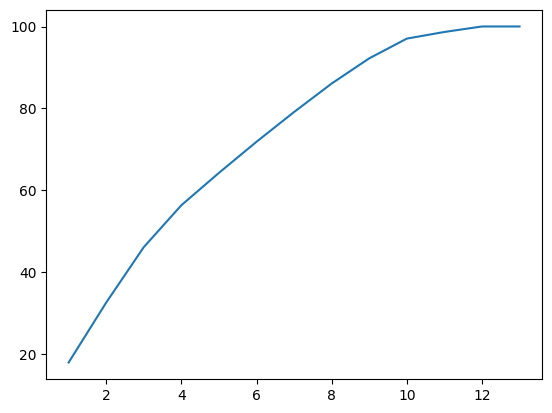

In [10]:
plt.plot(range(1, 14), np.cumsum(varianza_explicada_no_outlier))

Nuevamente observamos que explicar el dataset con solo de variables no resulta muy explicativo

In [11]:
## Se repite para poder realizar el scatter y los arboles - Investigar como hacerlos y poder realizar la matriz de componentes sin tener que "duplicar" el código

# Sacamos la variable categórica para realizar el PCA
no_outlier_values = no_outlier.drop(columns=['Attrition_Flag'])

scaler = StandardScaler()
scaler.fit(no_outlier_values.values) # Esto calcula la media y el desvio estandar
no_outlier_estandarizado = scaler.transform(no_outlier_values.values) # Esto hace la transformación en si

pca = PCA()
pca.fit(no_outlier_estandarizado)
no_outlier_pca = pca.transform(no_outlier_estandarizado)

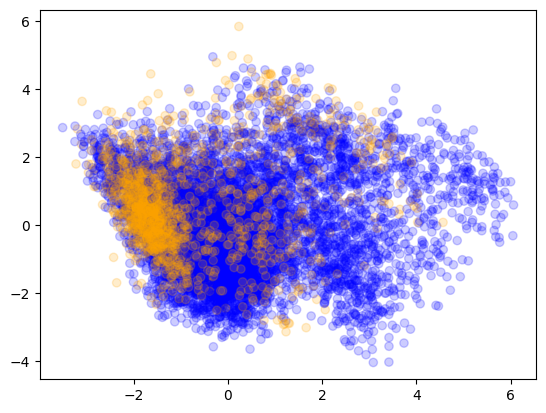

In [12]:
no_outlier['Attrition_Flag']

colores = {'Attrited Customer': "orange", 'Existing Customer' : "blue"}
plt.scatter(no_outlier_pca[:, 0], no_outlier_pca[:, 1], color = [colores[Attrition_Flag] for Attrition_Flag in no_outlier.Attrition_Flag], alpha=.2)

Con la varianza explicada y el scatter, podemos observar que el comportamiento, eliminando los Outliers, parece no variar.

Para profundizar un poco más en el modelo PCA (a modo académico) se analizá como está compuesta cada componente en una matriz de porcentajes y en un heatmap.

In [13]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
matriz_pca = pd.DataFrame(
                          data    = modelo_pca.components_,
                          columns = no_outlier_values.columns,
                          index   = range(len(no_outlier_values.columns))
                          )

# Se pasa la matriz a valores porcentuales para facilitar su lectura
matriz_porcent = (matriz_pca * 100).astype(int)
matriz_porcent

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,-12,10,-11,-26,-6,-11,42,6,42,9,50,46,16
1,46,-6,46,2,8,10,43,-6,44,-17,-15,-21,-21
2,-48,14,-48,18,-4,18,31,-9,32,-1,-29,-32,-15
3,8,-12,9,37,-12,-4,12,24,10,60,-16,-12,55
4,-5,-40,-3,-8,48,50,-2,-47,1,26,11,7,10
5,2,64,6,5,61,-32,-1,-22,0,8,-8,-2,17
6,-7,-12,-7,1,56,15,4,77,-2,-10,3,0,-10
7,-10,-58,-11,11,19,-72,6,-14,8,-8,-4,-3,-7
8,-1,-2,-1,-80,-1,-14,0,10,0,39,-19,-34,-7
9,2,9,5,26,-1,-7,-3,0,-3,57,19,12,-72


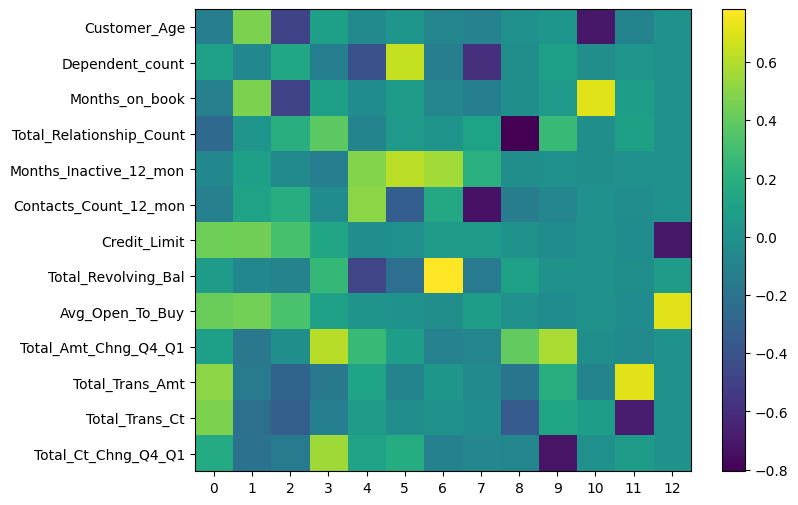

In [14]:
# Heatmap componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(no_outlier_values.columns)), no_outlier_values.columns)
plt.xticks(range(len(no_outlier_values.columns)), np.arange(modelo_pca.n_components_))
plt.grid(False)
plt.colorbar();

Como podemos ver tanto en la matriz porcentual, como en el heatmap, según en la componente que nos movamos, vamos a tener una sola variable que se mueve, es decir, no tenemos correlación visible entre las variables del dataset. Esto podemos deducirlo al necesitar varias componentes principales para explicar la varianza como vimos anteriormente. Lo que tal vez podríamos deducir, es que hay variables que influyen muy poco independientemente de que direccipon tomemos como es _"Dependet_count"_, _"Months_Inactuve_12_mon"_ y _"Total_Amt_Chng_Q4_Q1"_.